<a href="https://colab.research.google.com/github/Pablix17/Inteligencia-Artificial-2023/blob/main/Proyecto_Final_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final

link del video: https://youtu.be/3i0cBzVRWSw

## Introducción
Para este proyecto de aprendizaje de máquina se genera una serie de clasificadores con un objetivo, comparar cuál es mejor en la distinción deseada, para este proyecto se cuenta con un dataset de personajes de Marvel contando con sus características físicas y algunas de personalidad. Tomando en cuenta dicha información se desea conocer si un nuevo personaje serviría como héroe, villano o antihéroe dentro de este universo.




## Preprocesamiento

A continuacion se carga el dataset y se realiza la impresión de los datos.

In [1]:
import pandas as pd
# Cargar el archivo CSV
df_marvel = pd.read_csv('Marvel Movies.csv')
# Mostrar las primeras filas del dataframe para tener una idea del contenido
df_marvel.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


### Limpieza

Lo primero que se hace con el dataset es conocer sus características y la información de cada una de las columnas, también se conoce la información faltante de cada columna.

In [2]:
# Descripción general del dataset
description = df_marvel.describe(include='all')

# Conteo de valores nulos por columna
missing_values = df_marvel.isnull().sum()

description, missing_values


(                             name               ID           ALIGN        EYE  \
 count                       16376            12606           13564       6609   
 unique                      16376                4               3         24   
 top     Spider-Man (Peter Parker)  Secret Identity  Bad Characters  Blue Eyes   
 freq                            1             6275            6720       1962   
 mean                          NaN              NaN             NaN        NaN   
 std                           NaN              NaN             NaN        NaN   
 min                           NaN              NaN             NaN        NaN   
 25%                           NaN              NaN             NaN        NaN   
 50%                           NaN              NaN             NaN        NaN   
 75%                           NaN              NaN             NaN        NaN   
 max                           NaN              NaN             NaN        NaN   
 
              

En esta sección se rellena la columna de orientación sexual con el dato "CIS" pese al sesgo generado por asignar arbitrariamente la información. Posteriormente, se limpian los que quedan con datos faltantes y se generan las matrices de entrada y salida.

In [3]:
# Reemplazar valores faltantes en la columna 'GSM' con 'CIS'
df_marvel['GSM'].fillna('CIS', inplace=True)

# Eliminar filas con valores faltantes en las columnas, excepto 'GSM' que ya fue tratada
df_cleaned = df_marvel.dropna(subset=[col for col in df_marvel.columns if col != 'GSM'and col !='FIRST APPEARANCE' ])

# Crear la matriz de características X y el vector de etiquetas Y
X = df_cleaned.drop(columns=['ALIGN'])
Y = df_cleaned['ALIGN']

X.shape, Y.shape


((4402, 10), (4402,))

Nuevamente, se verifica la información restante para conocer con qué datos se cuenta para el estudio a realizar y se verifica la eliminación de los datos faltantes.

In [4]:
# Descripción general del dataset
description = df_cleaned.describe(include='all')

# Conteo de valores nulos por columna
missing_values = df_cleaned.isnull().sum()

description, missing_values

(                             name               ID            ALIGN  \
 count                        4402             4402             4402   
 unique                       4402                4                3   
 top     Spider-Man (Peter Parker)  Secret Identity  Good Characters   
 freq                            1             2459             1807   
 mean                          NaN              NaN              NaN   
 std                           NaN              NaN              NaN   
 min                           NaN              NaN              NaN   
 25%                           NaN              NaN              NaN   
 50%                           NaN              NaN              NaN   
 75%                           NaN              NaN              NaN   
 max                           NaN              NaN              NaN   
 
               EYE        HAIR              SEX   GSM              ALIVE  \
 count        4402        4402             4402  4402     

### De categórico a numérico

De cada columna se toman los datos y se cuentan la cantidad de valores repetidos, posteriormente se genera una columna de unos y ceros de cada subcategoría, se aumenta el dataset y se elimina la columna original.

In [5]:
conteo_Id = df_cleaned['ID'].value_counts()
print(conteo_Id)
print("------------------------------------------")
ID_class = pd.get_dummies(df_cleaned['ID'])

print(ID_class)
df_cleaned = pd.concat([df_cleaned, ID_class], axis=1)
# Eliminar la columna original de Color_Eyes y mantener solo las binarias
df_cleaned = df_cleaned.drop(columns=['ID'])
df_cleaned.head()

Secret Identity                  2459
Public Identity                  1397
No Dual Identity                  535
Known to Authorities Identity      11
Name: ID, dtype: int64
------------------------------------------
       Known to Authorities Identity  No Dual Identity  Public Identity  \
0                                  0                 0                0   
1                                  0                 0                1   
2                                  0                 0                1   
3                                  0                 0                1   
4                                  0                 1                0   
...                              ...               ...              ...   
15025                              0                 0                1   
15026                              0                 0                0   
15027                              0                 0                0   
15030                           

,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity
0,Spider-Man (Peter Parker),Good Characters,Hazel Eyes,Brown Hair,Male Characters,CIS,Living Characters,4043.0,Aug-62,1962.0,0,0,0,1
1,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,CIS,Living Characters,3360.0,Mar-41,1941.0,0,0,1,0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,CIS,Living Characters,3061.0,Oct-74,1974.0,0,0,1,0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Blue Eyes,Black Hair,Male Characters,CIS,Living Characters,2961.0,Mar-63,1963.0,0,0,1,0
4,Thor (Thor Odinson),Good Characters,Blue Eyes,Blond Hair,Male Characters,CIS,Living Characters,2258.0,Nov-50,1950.0,0,1,0,0


In [6]:
conteo_eye = df_cleaned['EYE'].value_counts()
print(conteo_eye)
print("------------------------------------------")
eye_colors = pd.get_dummies(df_cleaned['EYE'])

print(eye_colors)
df_cleaned = pd.concat([df_cleaned, eye_colors], axis=1)
# Eliminar la columna original de Color_Eyes y mantener solo las binarias
df_cleaned = df_cleaned.drop(columns=['EYE'])
df_cleaned.head()

Blue Eyes          1448
Brown Eyes         1335
Green Eyes          424
Black Eyes          317
Red Eyes            266
White Eyes          211
Yellow Eyes         148
Grey Eyes            73
Hazel Eyes           52
Variable Eyes        24
Purple Eyes          20
Orange Eyes          19
One Eye              12
Pink Eyes            11
Gold Eyes            10
Violet Eyes           8
Silver Eyes           6
Amber Eyes            4
Yellow Eyeballs       4
Black Eyeballs        3
No Eyes               3
Magenta Eyes          2
Multiple Eyes         2
Name: EYE, dtype: int64
------------------------------------------
       Amber Eyes  Black Eyeballs  Black Eyes  Blue Eyes  Brown Eyes  \
0               0               0           0          0           0   
1               0               0           0          1           0   
2               0               0           0          1           0   
3               0               0           0          1           0   
4               0    

,name,ALIGN,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Known to Authorities Identity,...,Orange Eyes,Pink Eyes,Purple Eyes,Red Eyes,Silver Eyes,Variable Eyes,Violet Eyes,White Eyes,Yellow Eyeballs,Yellow Eyes
0,Spider-Man (Peter Parker),Good Characters,Brown Hair,Male Characters,CIS,Living Characters,4043.0,Aug-62,1962.0,0,...,0,0,0,0,0,0,0,0,0,0
1,Captain America (Steven Rogers),Good Characters,White Hair,Male Characters,CIS,Living Characters,3360.0,Mar-41,1941.0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Black Hair,Male Characters,CIS,Living Characters,3061.0,Oct-74,1974.0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Black Hair,Male Characters,CIS,Living Characters,2961.0,Mar-63,1963.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Thor (Thor Odinson),Good Characters,Blond Hair,Male Characters,CIS,Living Characters,2258.0,Nov-50,1950.0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
conteo_hair = df_cleaned['HAIR'].value_counts()
print(conteo_hair)
print("------------------------------------------")
hair_colors = pd.get_dummies(df_cleaned['HAIR'])

print(hair_colors)
df_cleaned = pd.concat([df_cleaned, hair_colors], axis=1)
# Eliminar la columna original de Color_Eyes y mantener solo las binarias
df_cleaned = df_cleaned.drop(columns=['HAIR'])
df_cleaned.head()

Black Hair               1266
Brown Hair                886
Blond Hair                642
No Hair                   442
Bald                      274
White Hair                239
Red Hair                  234
Grey Hair                 169
Green Hair                 54
Auburn Hair                38
Blue Hair                  26
Strawberry Blond Hair      25
Purple Hair                20
Variable Hair              18
Pink Hair                  17
Orange Hair                15
Silver Hair                13
Yellow Hair                 9
Reddish Blond Hair          5
Gold Hair                   5
Magenta Hair                3
Light Brown Hair            2
Name: HAIR, dtype: int64
------------------------------------------
       Auburn Hair  Bald  Black Hair  Blond Hair  Blue Hair  Brown Hair  \
0                0     0           0           0          0           1   
1                0     0           0           0          0           0   
2                0     0           1           

,name,ALIGN,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Known to Authorities Identity,No Dual Identity,...,Orange Hair,Pink Hair,Purple Hair,Red Hair,Reddish Blond Hair,Silver Hair,Strawberry Blond Hair,Variable Hair,White Hair,Yellow Hair
0,Spider-Man (Peter Parker),Good Characters,Male Characters,CIS,Living Characters,4043.0,Aug-62,1962.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Captain America (Steven Rogers),Good Characters,Male Characters,CIS,Living Characters,3360.0,Mar-41,1941.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Male Characters,CIS,Living Characters,3061.0,Oct-74,1974.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Male Characters,CIS,Living Characters,2961.0,Mar-63,1963.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Thor (Thor Odinson),Good Characters,Male Characters,CIS,Living Characters,2258.0,Nov-50,1950.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
conteo_sex = df_cleaned['SEX'].value_counts()
print(conteo_sex)
print("------------------------------------------")
sex_colors = pd.get_dummies(df_cleaned['SEX'])

print(sex_colors)
df_cleaned = pd.concat([df_cleaned, sex_colors], axis=1)
# Eliminar la columna original de Color_Eyes y mantener solo las binarias
df_cleaned = df_cleaned.drop(columns=['SEX'])
df_cleaned.head()

Male Characters           3049
Female Characters         1337
Agender Characters          14
Genderfluid Characters       2
Name: SEX, dtype: int64
------------------------------------------
       Agender Characters  Female Characters  Genderfluid Characters  \
0                       0                  0                       0   
1                       0                  0                       0   
2                       0                  0                       0   
3                       0                  0                       0   
4                       0                  0                       0   
...                   ...                ...                     ...   
15025                   0                  1                       0   
15026                   0                  1                       0   
15027                   0                  0                       0   
15030                   0                  0                       0   
15038            

,name,ALIGN,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Known to Authorities Identity,No Dual Identity,Public Identity,...,Reddish Blond Hair,Silver Hair,Strawberry Blond Hair,Variable Hair,White Hair,Yellow Hair,Agender Characters,Female Characters,Genderfluid Characters,Male Characters
0,Spider-Man (Peter Parker),Good Characters,CIS,Living Characters,4043.0,Aug-62,1962.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Captain America (Steven Rogers),Good Characters,CIS,Living Characters,3360.0,Mar-41,1941.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,CIS,Living Characters,3061.0,Oct-74,1974.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,CIS,Living Characters,2961.0,Mar-63,1963.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,Thor (Thor Odinson),Good Characters,CIS,Living Characters,2258.0,Nov-50,1950.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
conteo_GSM = df_cleaned['GSM'].value_counts()
print(conteo_GSM)
print("------------------------------------------")
dato_a_eliminar = 'Genderfluid Characters'

# Filtrar las filas que contienen el dato a eliminar
filas_a_eliminar = df_cleaned[df_cleaned['GSM'] == dato_a_eliminar]
# Obtener los índices de las filas a eliminar
indices_a_eliminar = filas_a_eliminar.index
# Eliminar las filas que contienen el dato específico
df_cleaned = df_cleaned.drop(indices_a_eliminar)


gsm_colors = pd.get_dummies(df_cleaned['GSM'])
print(gsm_colors)
df_cleaned = pd.concat([df_cleaned, gsm_colors], axis=1)
# Eliminar la columna original de Color_Eyes y mantener solo las binarias
df_cleaned = df_cleaned.drop(columns=['GSM'])
df_cleaned.head()

CIS                       4344
Homosexual Characters       37
Bisexual Characters         18
Transvestites                1
Pansexual Characters         1
Genderfluid Characters       1
Name: GSM, dtype: int64
------------------------------------------
       Bisexual Characters  CIS  Homosexual Characters  Pansexual Characters  \
0                        0    1                      0                     0   
1                        0    1                      0                     0   
2                        0    1                      0                     0   
3                        0    1                      0                     0   
4                        0    1                      0                     0   
...                    ...  ...                    ...                   ...   
15025                    0    1                      0                     0   
15026                    0    1                      0                     0   
15027                    0 

,name,ALIGN,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity,...,Yellow Hair,Agender Characters,Female Characters,Genderfluid Characters,Male Characters,Bisexual Characters,CIS,Homosexual Characters,Pansexual Characters,Transvestites
0,Spider-Man (Peter Parker),Good Characters,Living Characters,4043.0,Aug-62,1962.0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,Captain America (Steven Rogers),Good Characters,Living Characters,3360.0,Mar-41,1941.0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Living Characters,3061.0,Oct-74,1974.0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Living Characters,2961.0,Mar-63,1963.0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,Thor (Thor Odinson),Good Characters,Living Characters,2258.0,Nov-50,1950.0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [10]:
conteo_alive = df_cleaned['ALIVE'].value_counts()
print(conteo_alive)
print("------------------------------------------")
ALIVE_colors = pd.get_dummies(df_cleaned['ALIVE'])
print(ALIVE_colors)
df_cleaned = pd.concat([df_cleaned, ALIVE_colors], axis=1)
# Eliminar la columna original de Color_Eyes y mantener solo las binarias
df_cleaned = df_cleaned.drop(columns=['ALIVE'])
df_cleaned.head()

Living Characters      3171
Deceased Characters    1230
Name: ALIVE, dtype: int64
------------------------------------------
       Deceased Characters  Living Characters
0                        0                  1
1                        0                  1
2                        0                  1
3                        0                  1
4                        0                  1
...                    ...                ...
15025                    0                  1
15026                    0                  1
15027                    1                  0
15030                    1                  0
15038                    0                  1

[4401 rows x 2 columns]


,name,ALIGN,APPEARANCES,FIRST APPEARANCE,Year,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity,Amber Eyes,...,Female Characters,Genderfluid Characters,Male Characters,Bisexual Characters,CIS,Homosexual Characters,Pansexual Characters,Transvestites,Deceased Characters,Living Characters
0,Spider-Man (Peter Parker),Good Characters,4043.0,Aug-62,1962.0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,Captain America (Steven Rogers),Good Characters,3360.0,Mar-41,1941.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,3061.0,Oct-74,1974.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,2961.0,Mar-63,1963.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,Thor (Thor Odinson),Good Characters,2258.0,Nov-50,1950.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1


Para el caso de la alineación no se generan nuevas columnas, sino que se les asigna un valor a cada etiqueta y así poder predecir a cuál grupo pertenece el personaje.

In [11]:
conteo_Type1 = df_cleaned['ALIGN'].value_counts()
print(conteo_Type1)
print("------------------------------------------")
Align_mapping = {
      'Good Characters': 0,
    'Bad Characters': 1,
    'Neutral Characters': 2
}
df_cleaned['ALIGN'] = df_cleaned['ALIGN'].replace(Align_mapping)

df_cleaned.head()

Good Characters       1806
Bad Characters        1765
Neutral Characters     830
Name: ALIGN, dtype: int64
------------------------------------------


,name,ALIGN,APPEARANCES,FIRST APPEARANCE,Year,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity,Amber Eyes,...,Female Characters,Genderfluid Characters,Male Characters,Bisexual Characters,CIS,Homosexual Characters,Pansexual Characters,Transvestites,Deceased Characters,Living Characters
0,Spider-Man (Peter Parker),0,4043.0,Aug-62,1962.0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,Captain America (Steven Rogers),0,3360.0,Mar-41,1941.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,"Wolverine (James \""Logan\"" Howlett)",2,3061.0,Oct-74,1974.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,"Iron Man (Anthony \""Tony\"" Stark)",0,2961.0,Mar-63,1963.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,Thor (Thor Odinson),0,2258.0,Nov-50,1950.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1


### Creación de csv
Para este paso se crean las matrices resultantes tanto la de salida como la de entrada, finalmente se almacena en un nuevo documento.

In [12]:
X = df_cleaned.drop(columns=['ALIGN','name','FIRST APPEARANCE'])
Y = df_cleaned['ALIGN']
df_cleaned.to_csv('Modificado_Marvel.csv', index=False)

## Metodos de evaluación
Primero se instala la libreria de PyCaret para el manejo de datos.

In [13]:
!pip install pycaret[analysis] --quiet
!pip install shap --quiet

Se hace  cross validación de 5 pliegues, se asigna que el dataset a trabajar es el ya modificado, se ignora la columna de nombre y primera aparición por su naturaleza categórica y variada, se establece que la categoría a predecir es la alineación y se aclara que no hay datos categóricos.

In [14]:
from pycaret.classification import setup, compare_models,evaluate_model,tune_model,interpret_model,create_model

categorical_features_to_ignore = ['name','FIRST APPEARANCE']
clf = setup(data=df_cleaned, target='ALIGN', categorical_features=[],ignore_features=categorical_features_to_ignore, fold=5 )


,Description,Value
0,Session id,4260
1,Target,ALIGN
2,Target type,Multiclass
3,Original data shape,"(4401, 65)"
4,Transformed data shape,"(4401, 63)"
5,Transformed train set shape,"(3080, 63)"
6,Transformed test set shape,"(1321, 63)"
7,Ignore features,2
8,Numeric features,62
9,Preprocess,True


En el caso de normalización y PCA no resultan convenientes, dado que ambos causan un sesgo de las clases, en caso de normalización causa que la salida predomine en torno a héroe, incluso los datos del propio dataset original que son etiquetados como villano.


Por otro lado, PCA dice que con una característica es suficiente para determinar, al hacer eso se pierde la diversión del proyecto dado que no permite analizar combinaciones de detalles, por ello la amplia dimensionalidad no resulta ser un inconveniente.

In [15]:
best_model = compare_models(fold=9)
tuned_best_model = tune_model(best_model, n_iter=10)
# Evaluar el mejor modelo
evaluate_model(tuned_best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5497,0.7028,0.5497,0.5143,0.5055,0.2490,0.2595,1.5722
lightgbm,Light Gradient Boosting Machine,0.5435,0.6984,0.5435,0.5136,0.5204,0.2549,0.2592,1.4433
xgboost,Extreme Gradient Boosting,0.5393,0.6902,0.5393,0.5127,0.5195,0.2505,0.2540,0.3100
ada,Ada Boost Classifier,0.5354,0.6761,0.5354,0.4934,0.4924,0.2252,0.2350,0.2922
lr,Logistic Regression,0.5318,0.6650,0.5318,0.4554,0.4774,0.2130,0.2254,1.8567
ridge,Ridge Classifier,0.5270,0.0000,0.5270,0.4843,0.4766,0.2064,0.2172,0.0733
lda,Linear Discriminant Analysis,0.5227,0.6613,0.5227,0.4761,0.4803,0.2042,0.2132,0.1333
rf,Random Forest Classifier,0.5058,0.6630,0.5058,0.4802,0.4900,0.2015,0.2032,1.2078
knn,K Neighbors Classifier,0.4967,0.6239,0.4967,0.4571,0.4651,0.1692,0.1745,0.1878
nb,Naive Bayes,0.4848,0.6289,0.4848,0.4763,0.4527,0.1610,0.1738,0.0767


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5341,0.6841,0.5341,0.5192,0.4886,0.2207,0.2311
1,0.5714,0.7326,0.5714,0.6047,0.5181,0.2809,0.2962
2,0.5747,0.7284,0.5747,0.5616,0.5248,0.2877,0.3012
3,0.5487,0.6972,0.5487,0.5087,0.5083,0.2491,0.2581
4,0.5357,0.6696,0.5357,0.5131,0.4950,0.2256,0.2346
Mean,0.5529,0.7024,0.5529,0.5415,0.5069,0.2528,0.2643
Std,0.0172,0.0246,0.0172,0.0368,0.0136,0.0275,0.0297


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

En lo mostrado previamente se comparan los modelos de clasificación para verificar cuál es el mejor para el planteamiento de los datos y la salida deseada.

Se obtiene que el mejor resultado es clasificación por aumento de gradiente con los siguientes valores de desempeño


*   AUC = 70.2%
*   F1 = 50.1%
*   Mcc = 29.9%

Pero al optimizarlo se obtiene que en promedio esos valores son:

*   AUC = 70.2%
*   F1 = 50.6%
*   Mcc = 26.4%


## KNN
Este modelo se obtiene que los hiperparametros son los pesos por distancia manhatattan a partir de 47 vecinos y sus valores de desempeño son en promedio:
*   AUC = 67.2%
*   F1 = 49.9%
*   Mcc = 24.8%


In [41]:
knn_model = create_model('knn',fold=9)
tuned_knn_model = tune_model(knn_model, n_iter=100)
evaluate_model(tuned_knn_model)

,Parameters
algorithm,auto
leaf_size,30
metric,manhattan
metric_params,None
n_jobs,-1
n_neighbors,47
p,2
weights,distance


##Naive Bayes
Naive Bayes es un metodo parametrico por lo cual no cuenta con datos parametricos.
*   AUC = 65.4%
*   F1 = 48.1%
*   Mcc = 20.8%

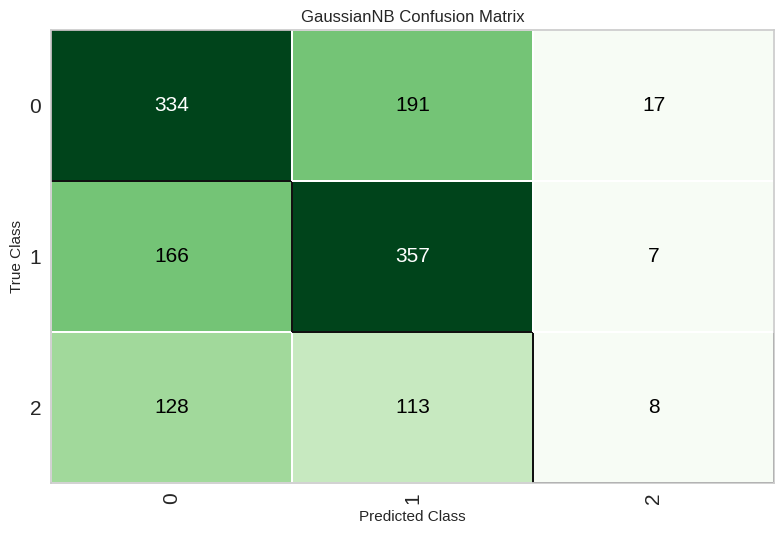

In [32]:
nb_model = create_model('nb', fold=9)

# Ajustar modelo Naive Bayes (Tuning)
tuned_nb_model = tune_model(nb_model, n_iter=100)

# Evaluar el modelo
evaluate_model(tuned_nb_model)

##Random Forest

*   AUC = 66.3%
*   F1 = 49%
*   Mcc = 20.3%

In [33]:
# Crear modelo Random Forest
rf_model = create_model('rf', fold=9)

# Ajustar modelo Random Forest (Tuning)
tuned_rf_model = tune_model(rf_model, n_iter=10)
evaluate_model(tuned_rf_model)

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


De este clasificador se obtiene que las características más importantes son apariciones, año, identidad y género.

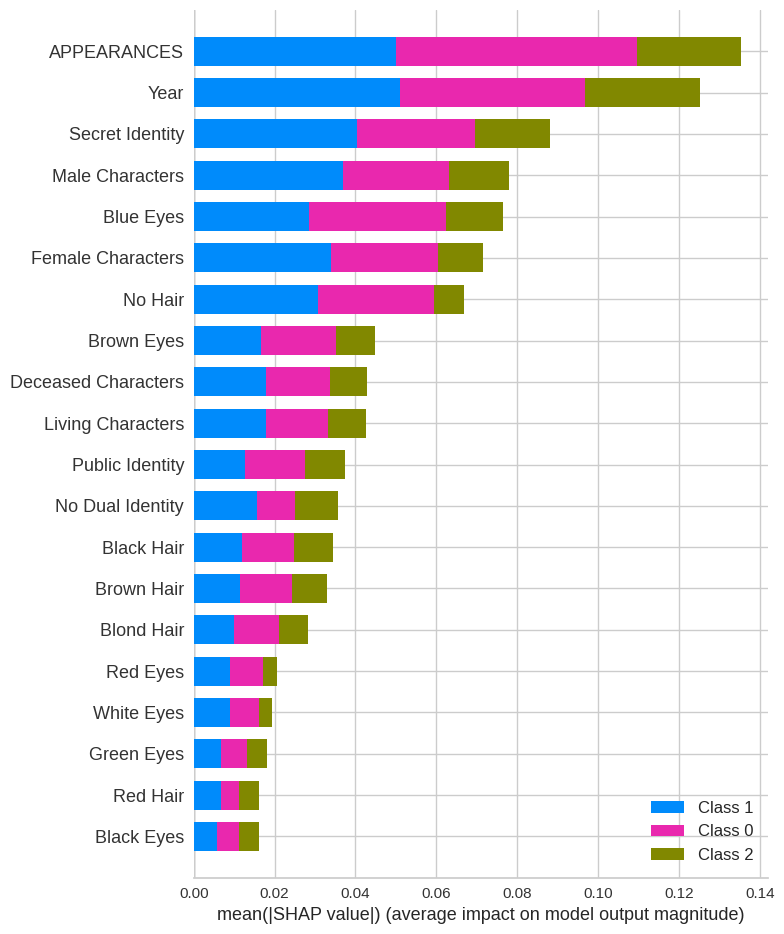

In [34]:
interpret_model(tuned_rf_model)

In [35]:
lista_caracteristicas = df_cleaned.columns.tolist()

print(lista_caracteristicas)

['name', 'ALIGN', 'APPEARANCES', 'FIRST APPEARANCE', 'Year', 'Known to Authorities Identity', 'No Dual Identity', 'Public Identity', 'Secret Identity', 'Amber Eyes', 'Black Eyeballs', 'Black Eyes', 'Blue Eyes', 'Brown Eyes', 'Gold Eyes', 'Green Eyes', 'Grey Eyes', 'Hazel Eyes', 'Magenta Eyes', 'Multiple Eyes', 'No Eyes', 'One Eye', 'Orange Eyes', 'Pink Eyes', 'Purple Eyes', 'Red Eyes', 'Silver Eyes', 'Variable Eyes', 'Violet Eyes', 'White Eyes', 'Yellow Eyeballs', 'Yellow Eyes', 'Auburn Hair', 'Bald', 'Black Hair', 'Blond Hair', 'Blue Hair', 'Brown Hair', 'Gold Hair', 'Green Hair', 'Grey Hair', 'Light Brown Hair', 'Magenta Hair', 'No Hair', 'Orange Hair', 'Pink Hair', 'Purple Hair', 'Red Hair', 'Reddish Blond Hair', 'Silver Hair', 'Strawberry Blond Hair', 'Variable Hair', 'White Hair', 'Yellow Hair', 'Agender Characters', 'Female Characters', 'Genderfluid Characters', 'Male Characters', 'Bisexual Characters', 'CIS', 'Homosexual Characters', 'Pansexual Characters', 'Transvestites', 'Dec

## Ensayo

A continuación se prueba el modelo ingresando nuevos valores y se busca consultar a qué grupo pertenece.

In [36]:
caracteristicas = [
    'APPEARANCES',

    'Year',

    'Known to Authorities Identity','No Dual Identity', 'Public Identity', 'Secret Identity',

    'Amber Eyes', 'Black Eyeballs', 'Black Eyes','Blue Eyes', 'Brown Eyes', 'Gold Eyes',
    'Green Eyes', 'Grey Eyes', 'Hazel Eyes', 'Magenta Eyes','Multiple Eyes', 'No Eyes',
    'One Eye', 'Orange Eyes', 'Pink Eyes', 'Purple Eyes', 'Red Eyes',
    'Silver Eyes', 'Variable Eyes', 'Violet Eyes', 'White Eyes', 'Yellow Eyeballs', 'Yellow Eyes',

    'Auburn Hair', 'Bald', 'Black Hair', 'Blond Hair', 'Blue Hair', 'Brown Hair', 'Gold Hair',
    'Green Hair', 'Grey Hair', 'Light Brown Hair', 'Magenta Hair', 'No Hair', 'Orange Hair', 'Pink Hair',
    'Purple Hair', 'Red Hair', 'Reddish Blond Hair', 'Silver Hair', 'Strawberry Blond Hair',
    'Variable Hair', 'White Hair', 'Yellow Hair',

    'Agender Characters', 'Female Characters','Genderfluid Characters', 'Male Characters',

    'Bisexual Characters', 'CIS', 'Homosexual Characters','Pansexual Characters', 'Transvestites',

    'Deceased Characters', 'Living Characters'
]

# Crear un DataFrame vacío con las características proporcionadas inicializadas con 0
nuevo_dataset = pd.DataFrame(columns=caracteristicas)
nuevo_dataset.loc[0] = [0] * len(caracteristicas)  # Asignar 0 a todas las columnas en la primera fila

# Cambiar el valor de 'Brown Eyes' a 1 en la primera fila
nuevo_dataset.at[0, 'Public Identity'] = 1
nuevo_dataset.at[0, 'Blue Eyes'] = 1
nuevo_dataset.at[0, 'Auburn Hair'] = 1
nuevo_dataset.at[0, 'Male Characters'] = 1
nuevo_dataset.at[0, 'Living Characters'] = 1
nuevo_dataset.at[0, 'CIS'] = 1
nuevo_dataset.at[0, 'Year'] = 1964
nuevo_dataset.at[0, 'APPEARANCES'] = 692
print(nuevo_dataset)

   APPEARANCES  Year  Known to Authorities Identity  No Dual Identity  \
0          692  1964                              0                 0   

   Public Identity  Secret Identity  Amber Eyes  Black Eyeballs  Black Eyes  \
0                1                0           0               0           0   

   Blue Eyes  ...  Female Characters  Genderfluid Characters  Male Characters  \
0          1  ...                  0                       0                1   

   Bisexual Characters  CIS  Homosexual Characters  Pansexual Characters  \
0                    0    1                      0                     0   

   Transvestites  Deceased Characters  Living Characters  
0              0                    0                  1  

[1 rows x 62 columns]


In [37]:

prediction0 = tuned_best_model.predict(nuevo_dataset)
legendary_status0 = prediction0[0]
# Utilizando if-elif-else para asignar etiquetas
if legendary_status0 == 0:
    etiqueta0 = 'Heroe'
elif legendary_status0 == 1:
    etiqueta0= 'Villano'
elif legendary_status0 == 2:
    etiqueta0 = 'Neutral'
else:
    etiqueta0 = 'Otro'  # En caso de que el valor no sea 0, 1 o 2
print(f"Según el mejor modelo tu personaje es: {etiqueta0}")
probabilidades_prediccion0 = tuned_best_model.predict_proba(nuevo_dataset)
# Visualiza las probabilidades de las primeras muestras de los nuevos datos
print("Probabilidades predichas para el mejor:")
print(probabilidades_prediccion0[:5])
print("------------------------------------------")

# b
prediction1 = tuned_knn_model.predict(nuevo_dataset)
legendary_status1 = prediction1[0]
# Utilizando if-elif-else para asignar etiquetas
if legendary_status1 == 0:
    etiqueta1 = 'Heroe'
elif legendary_status1 == 1:
    etiqueta1 = 'Villano'
elif legendary_status1 == 2:
    etiqueta1 = 'Neutral'
else:
    etiqueta1 = 'Otro'  # En caso de que el valor no sea 0, 1 o 2
print(f"Según Knn tu personaje es: {etiqueta1}")
probabilidades_prediccion1 = tuned_knn_model.predict_proba(nuevo_dataset)
# Visualiza las probabilidades de las primeras muestras de los nuevos datos
print("Probabilidades predichas para knn:")
print(probabilidades_prediccion1[:5])
print("------------------------------------------")

#c
prediction2 = tuned_nb_model.predict(nuevo_dataset)
legendary_status2 = prediction2[0]
# Utilizando if-elif-else para asignar etiquetas
if legendary_status2 == 0:
    etiqueta2 = 'Heroe'
elif legendary_status2 == 1:
    etiqueta2 = 'Villano'
elif legendary_status2 == 2:
    etiqueta2 = 'Neutral'
else:
    etiqueta2 = 'Otro'  # En caso de que el valor no sea 0, 1 o 2

print(f"Según NB tu personaje es: {etiqueta2}")
probabilidades_prediccion2 = tuned_nb_model.predict_proba(nuevo_dataset)
# Visualiza las probabilidades de las primeras muestras de los nuevos datos
print("Probabilidades predichas para nb:")
print(probabilidades_prediccion2[:5])
print("------------------------------------------")

prediction3 = tuned_rf_model.predict(nuevo_dataset)
legendary_status3 = prediction3[0]
# Utilizando if-elif-else para asignar etiquetas
if legendary_status3 == 0:
    etiqueta3 = 'Heroe'
elif legendary_status3 == 1:
    etiqueta3 = 'Villano'
elif legendary_status3 == 2:
    etiqueta3 = 'Neutral'
else:
    etiqueta3 = 'Otro'  # En caso de que el valor no sea 0, 1 o 2
print(f"Según RF tu personaje es: {etiqueta3}")
probabilidades_prediccion3 = tuned_rf_model.predict_proba(nuevo_dataset)
# Visualiza las probabilidades de las primeras muestras de los nuevos datos
print("Probabilidades predichas para rf")
print(probabilidades_prediccion3[:5])

Según el mejor modelo tu personaje es: Heroe
Probabilidades predichas para el mejor:
[[0.69940798 0.17326823 0.1273238 ]]
------------------------------------------
Según Knn tu personaje es: Villano
Probabilidades predichas para knn:
[[0. 1. 0.]]
------------------------------------------
Según NB tu personaje es: Heroe
Probabilidades predichas para nb:
[[9.93111827e-01 8.15120307e-42 6.88817260e-03]]
------------------------------------------
Según RF tu personaje es: Villano
Probabilidades predichas para rf
[[0.34 0.63 0.03]]


In [38]:
caracteristicas1 = [
    'APPEARANCES',

    'Year',

    'Known to Authorities Identity','No Dual Identity', 'Public Identity', 'Secret Identity',

    'Amber Eyes', 'Black Eyeballs', 'Black Eyes','Blue Eyes', 'Brown Eyes', 'Gold Eyes',
    'Green Eyes', 'Grey Eyes', 'Hazel Eyes', 'Magenta Eyes','Multiple Eyes', 'No Eyes',
    'One Eye', 'Orange Eyes', 'Pink Eyes', 'Purple Eyes', 'Red Eyes',
    'Silver Eyes', 'Variable Eyes', 'Violet Eyes', 'White Eyes', 'Yellow Eyeballs', 'Yellow Eyes',

    'Auburn Hair', 'Bald', 'Black Hair', 'Blond Hair', 'Blue Hair', 'Brown Hair', 'Gold Hair',
    'Green Hair', 'Grey Hair', 'Light Brown Hair', 'Magenta Hair', 'No Hair', 'Orange Hair', 'Pink Hair',
    'Purple Hair', 'Red Hair', 'Reddish Blond Hair', 'Silver Hair', 'Strawberry Blond Hair',
    'Variable Hair', 'White Hair', 'Yellow Hair',

    'Agender Characters', 'Female Characters','Genderfluid Characters', 'Male Characters',

    'Bisexual Characters', 'CIS', 'Homosexual Characters','Pansexual Characters', 'Transvestites',

    'Deceased Characters', 'Living Characters'
]

# Crear un DataFrame vacío con las características proporcionadas inicializadas con 0
nuevo_dataset1 = pd.DataFrame(columns=caracteristicas1)
nuevo_dataset1.loc[0] = [0] * len(caracteristicas1)  # Asignar 0 a todas las columnas en la primera fila

# Cambiar el valor de 'Brown Eyes' a 1 en la primera fila
nuevo_dataset1.at[0, 'Secret Identity'] = 1
nuevo_dataset1.at[0, 'Black Eyes'] = 1
nuevo_dataset1.at[0, 'Variable Hair'] = 1
nuevo_dataset1.at[0, 'Genderfluid Characters'] = 1
nuevo_dataset1.at[0, 'Deceased Characters'] = 1
nuevo_dataset1.at[0, 'Bisexual Characters'] = 1
nuevo_dataset1.at[0, 'Year'] = 2002
nuevo_dataset1.at[0, 'APPEARANCES'] =8
print(nuevo_dataset1)

   APPEARANCES  Year  Known to Authorities Identity  No Dual Identity  \
0            8  2002                              0                 0   

   Public Identity  Secret Identity  Amber Eyes  Black Eyeballs  Black Eyes  \
0                0                1           0               0           1   

   Blue Eyes  ...  Female Characters  Genderfluid Characters  Male Characters  \
0          0  ...                  0                       1                0   

   Bisexual Characters  CIS  Homosexual Characters  Pansexual Characters  \
0                    1    0                      0                     0   

   Transvestites  Deceased Characters  Living Characters  
0              0                    1                  0  

[1 rows x 62 columns]


In [39]:

prediction0 = tuned_best_model.predict(nuevo_dataset1)
legendary_status0 = prediction0[0]
# Utilizando if-elif-else para asignar etiquetas
if legendary_status0 == 0:
    etiqueta0 = 'Heroe'
elif legendary_status0 == 1:
    etiqueta0= 'Villano'
elif legendary_status0 == 2:
    etiqueta0 = 'Neutral'
else:
    etiqueta0 = 'Otro'  # En caso de que el valor no sea 0, 1 o 2
print(f"Según el mejor modelo tu personaje es: {etiqueta0}")
probabilidades_prediccion0 = tuned_best_model.predict_proba(nuevo_dataset1)
# Visualiza las probabilidades de las primeras muestras de los nuevos datos
print("Probabilidades predichas para el mejor:")
print(probabilidades_prediccion0[:5])
print("------------------------------------------")

# b
prediction1 = tuned_knn_model.predict(nuevo_dataset1)
legendary_status1 = prediction1[0]
# Utilizando if-elif-else para asignar etiquetas
if legendary_status1 == 0:
    etiqueta1 = 'Heroe'
elif legendary_status1 == 1:
    etiqueta1 = 'Villano'
elif legendary_status1 == 2:
    etiqueta1 = 'Neutral'
else:
    etiqueta1 = 'Otro'  # En caso de que el valor no sea 0, 1 o 2
print(f"Según Knn tu personaje es: {etiqueta1}")
probabilidades_prediccion1 = tuned_knn_model.predict_proba(nuevo_dataset1)
# Visualiza las probabilidades de las primeras muestras de los nuevos datos
print("Probabilidades predichas para knn:")
print(probabilidades_prediccion1[:5])
print("------------------------------------------")

#c
prediction2 = tuned_nb_model.predict(nuevo_dataset1)
legendary_status2 = prediction2[0]
# Utilizando if-elif-else para asignar etiquetas
if legendary_status2 == 0:
    etiqueta2 = 'Heroe'
elif legendary_status2 == 1:
    etiqueta2 = 'Villano'
elif legendary_status2 == 2:
    etiqueta2 = 'Neutral'
else:
    etiqueta2 = 'Otro'  # En caso de que el valor no sea 0, 1 o 2

print(f"Según NB tu personaje es: {etiqueta2}")
probabilidades_prediccion2 = tuned_nb_model.predict_proba(nuevo_dataset1)
# Visualiza las probabilidades de las primeras muestras de los nuevos datos
print("Probabilidades predichas para nb:")
print(probabilidades_prediccion2[:5])
print("------------------------------------------")

prediction3 = tuned_rf_model.predict(nuevo_dataset1)
legendary_status3 = prediction3[0]
# Utilizando if-elif-else para asignar etiquetas
if legendary_status3 == 0:
    etiqueta3 = 'Heroe'
elif legendary_status3 == 1:
    etiqueta3 = 'Villano'
elif legendary_status3 == 2:
    etiqueta3 = 'Neutral'
else:
    etiqueta3 = 'Otro'  # En caso de que el valor no sea 0, 1 o 2
print(f"Según RF tu personaje es: {etiqueta3}")
probabilidades_prediccion3 = tuned_rf_model.predict_proba(nuevo_dataset1)
# Visualiza las probabilidades de las primeras muestras de los nuevos datos
print("Probabilidades predichas para rf")
print(probabilidades_prediccion3[:5])



Según el mejor modelo tu personaje es: Neutral
Probabilidades predichas para el mejor:
[[0.25428116 0.34146087 0.40425797]]
------------------------------------------
Según Knn tu personaje es: Villano
Probabilidades predichas para knn:
[[0.30221244 0.42383876 0.2739488 ]]
------------------------------------------
Según NB tu personaje es: Neutral
Probabilidades predichas para nb:
[[3.05115749e-07 6.17189000e-09 9.99999689e-01]]
------------------------------------------
Según RF tu personaje es: Heroe
Probabilidades predichas para rf
[[0.47 0.28 0.25]]


In [40]:
from pycaret.classification import  finalize_model,save_model
final_tuned_best_model = finalize_model(tuned_best_model)
save_model(final_tuned_best_model, 'final_tuned_best_model')
final_tuned_knn_model = finalize_model(tuned_knn_model)
save_model(final_tuned_knn_model, 'final_tuned_knn_model')
final_tuned_nb_model = finalize_model(tuned_nb_model)
save_model(final_tuned_nb_model, 'final_tuned_nb_model')
final_tuned_rf_model = finalize_model(tuned_rf_model)
save_model(final_tuned_rf_model, 'final_tuned_rf_model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['APPEARANCES', 'Year',
                                              'Known to Authorities Identity',
                                              'No Dual Identity',
                                              'Public Identity',
                                              'Secret Identity', 'Amber Eyes',
                                              'Black Eyeballs', 'Black Eyes',
                                              'Blue Eyes', 'Brown Eyes',
                                              'Gold Eyes', 'Green Eyes',
                                              'Grey Eyes', 'Hazel Eyes',
                                              'Magenta Eyes', 'Multiple Eyes',
                                              'No E...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
         

## Conclusiones



*   Los métodos de clasificación no son tan precisos como podrían, pero en general dan un resultado similar de tal manera que es entretenido crear nuevos personajes y crear combinaciones con el fin de intuir su agrupación.
*  PCA y normalización no son requeridos en este caso de análisis, dado que los datos son binarios en su mayoría, el uso de pocas características hace que se pierda el sentido del proyecto pensado.

